# Project: Identify Customer Segments

In this project, unsupervised learning techniques are applied to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that is used has been provided by Bertelsmann Arvato Analytics.



In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# magic word for producing visualizations in notebook
%matplotlib inline

'''
Import note: The classroom currently uses sklearn version 0.19.
If you need to use an imputer, it is available in sklearn.preprocessing.Imputer,
instead of sklearn.impute as in newer versions of sklearn.
'''

'\nImport note: The classroom currently uses sklearn version 0.19.\nIf you need to use an imputer, it is available in sklearn.preprocessing.Imputer,\ninstead of sklearn.impute as in newer versions of sklearn.\n'

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. This information will be used to cluster the general population into groups with similar demographic properties. Then, it can be seen how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.


In [2]:
# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv', sep=';')

# Load in the feature summary file.
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', sep=';')

In [3]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).

azdias.head(15).T



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
AGER_TYP,-1,-1,-1,2,-1,3,-1,-1,-1,-1,0,-1,-1,-1,-1
ALTERSKATEGORIE_GROB,2,1,3,4,3,1,2,1,3,3,3,2,3,1,3
ANREDE_KZ,1,2,2,2,1,2,2,1,1,2,2,1,1,2,1
CJT_GESAMTTYP,2,5,3,2,5,2,5,3,3,4,1,6,6,5,6
FINANZ_MINIMALIST,3,1,1,4,4,3,1,3,4,2,2,3,5,1,3
FINANZ_SPARER,4,5,4,2,3,1,5,3,4,4,2,4,3,4,4
FINANZ_VORSORGER,3,2,1,5,4,5,1,4,2,2,5,3,4,3,3
FINANZ_ANLEGER,5,5,2,2,1,2,5,1,4,3,3,5,2,5,5
FINANZ_UNAUFFAELLIGER,5,4,3,1,3,2,4,3,2,5,1,5,4,5,5
FINANZ_HAUSBAUER,3,5,5,2,2,5,3,2,2,4,5,3,1,2,3


In [4]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
AGER_TYP                 891221 non-null int64
ALTERSKATEGORIE_GROB     891221 non-null int64
ANREDE_KZ                891221 non-null int64
CJT_GESAMTTYP            886367 non-null float64
FINANZ_MINIMALIST        891221 non-null int64
FINANZ_SPARER            891221 non-null int64
FINANZ_VORSORGER         891221 non-null int64
FINANZ_ANLEGER           891221 non-null int64
FINANZ_UNAUFFAELLIGER    891221 non-null int64
FINANZ_HAUSBAUER         891221 non-null int64
FINANZTYP                891221 non-null int64
GEBURTSJAHR              891221 non-null int64
GFK_URLAUBERTYP          886367 non-null float64
GREEN_AVANTGARDE         891221 non-null int64
HEALTH_TYP               891221 non-null int64
LP_LEBENSPHASE_FEIN      886367 non-null float64
LP_LEBENSPHASE_GROB      886367 non-null float64
LP_FAMILIE_FEIN          886367 non-null float64
LP_FAMILIE_GROB          886367 n

In [5]:
feat_info.head()

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]


In [6]:
feat_info.shape


(85, 4)

In [7]:
feat_info.describe()

,attribute,information_level,type,missing_or_unknown
count,85,85,85,85
unique,85,9,5,9
top,KBA05_ANTG4,person,ordinal,[-1]
freq,1,43,49,26


## Step 1: Preprocessing

* Assess Missing Data

* Convert Missing Value Codes to NaNs


In [8]:
# Identify missing or unknown data values and convert them to NaNs.
azdias.isnull().sum().sum()


4896838

In [9]:
azdias.isnull().sum()

AGER_TYP                      0
ALTERSKATEGORIE_GROB          0
ANREDE_KZ                     0
CJT_GESAMTTYP              4854
FINANZ_MINIMALIST             0
FINANZ_SPARER                 0
FINANZ_VORSORGER              0
FINANZ_ANLEGER                0
FINANZ_UNAUFFAELLIGER         0
FINANZ_HAUSBAUER              0
FINANZTYP                     0
GEBURTSJAHR                   0
GFK_URLAUBERTYP            4854
GREEN_AVANTGARDE              0
HEALTH_TYP                    0
LP_LEBENSPHASE_FEIN        4854
LP_LEBENSPHASE_GROB        4854
LP_FAMILIE_FEIN            4854
LP_FAMILIE_GROB            4854
LP_STATUS_FEIN             4854
LP_STATUS_GROB             4854
NATIONALITAET_KZ              0
PRAEGENDE_JUGENDJAHRE         0
RETOURTYP_BK_S             4854
SEMIO_SOZ                     0
SEMIO_FAM                     0
SEMIO_REL                     0
SEMIO_MAT                     0
SEMIO_VERT                    0
SEMIO_LUST                    0
                          ...  
OST_WEST

In [10]:
# take the missing and unknown column in feat_info and turn it into a new column. 
# Start at 1 end -1 to get rid of brackets and split on the comma to make list
feat_info['nas'] = feat_info['missing_or_unknown'].apply(lambda x: x[1:-1].split(','))
feat_info.head()

,attribute,information_level,type,missing_or_unknown,nas
0,AGER_TYP,person,categorical,"[-1,0]","[-1, 0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]","[-1, 0, 9]"
2,ANREDE_KZ,person,categorical,"[-1,0]","[-1, 0]"
3,CJT_GESAMTTYP,person,categorical,[0],[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1],[-1]


In [11]:
# Go through the columns and compare nas values to the values in the dataset and convert to null
for attribute, nas in zip(feat_info['attribute'], feat_info['nas']):
    if nas[0] != '':
        for na in nas:
            if na.isnumeric() or na.lstrip('-').isnumeric():
                na = int(na)
            azdias.loc[azdias[attribute] == na, attribute] = np.nan

In [12]:
azdias.isnull().sum().sum()

8373929

In [13]:
azdias.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,NaN,2.0,1.0,2.0,3.0,4.0,3.0,5.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,2.0,5.0,1.0,5.0,2.0,5.0,4.0,5.0,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,NaN,3.0,2.0,3.0,1.0,4.0,1.0,2.0,3.0,5.0,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2.0,4.0,2.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,NaN,3.0,1.0,5.0,4.0,3.0,4.0,1.0,3.0,2.0,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


#### Assess Missing Data in Each Column


In [14]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.
azdias.isnull().sum()

AGER_TYP                 685843
ALTERSKATEGORIE_GROB       2881
ANREDE_KZ                     0
CJT_GESAMTTYP              4854
FINANZ_MINIMALIST             0
FINANZ_SPARER                 0
FINANZ_VORSORGER              0
FINANZ_ANLEGER                0
FINANZ_UNAUFFAELLIGER         0
FINANZ_HAUSBAUER              0
FINANZTYP                     0
GEBURTSJAHR              392318
GFK_URLAUBERTYP            4854
GREEN_AVANTGARDE              0
HEALTH_TYP               111196
LP_LEBENSPHASE_FEIN       97632
LP_LEBENSPHASE_GROB       94572
LP_FAMILIE_FEIN           77792
LP_FAMILIE_GROB           77792
LP_STATUS_FEIN             4854
LP_STATUS_GROB             4854
NATIONALITAET_KZ         108315
PRAEGENDE_JUGENDJAHRE    108164
RETOURTYP_BK_S             4854
SEMIO_SOZ                     0
SEMIO_FAM                     0
SEMIO_REL                     0
SEMIO_MAT                     0
SEMIO_VERT                    0
SEMIO_LUST                    0
                          ...  
OST_WEST

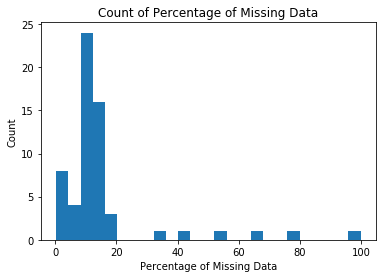

In [15]:
# Investigate patterns in the amount of missing data in each column.
missing_data = azdias.isnull().sum()
azd_total = azdias.shape[0]
missing_data = (missing_data[missing_data > 0] / azd_total)*100
plt.hist(missing_data,bins=25)
plt.xlabel('Percentage of Missing Data')
plt.ylabel('Count')
plt.title('Count of Percentage of Missing Data');

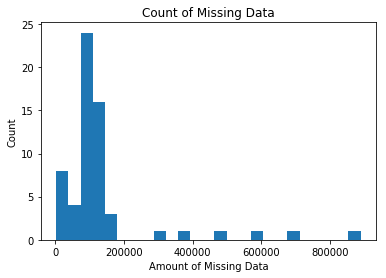

In [16]:
missing_data = azdias.isnull().sum()
azd_total = azdias.shape[0]
missing_data = missing_data[missing_data > 0]
plt.hist(missing_data,bins=25)
plt.xlabel('Amount of Missing Data')
plt.ylabel('Count')
plt.title('Count of Missing Data');

In [17]:
# Order the columns with missing data to see the top offenders
azdias_null = azdias.isnull().sum()
azdias_null.sort_values(inplace=True, ascending=False)
azdias_null=azdias_null[azdias_null > 0]
azdias_null


TITEL_KZ                 889061
AGER_TYP                 685843
KK_KUNDENTYP             584612
KBA05_BAUMAX             476524
GEBURTSJAHR              392318
ALTER_HH                 310267
REGIOTYP                 158064
KKK                      158064
W_KEIT_KIND_HH           147988
KBA05_ANTG4              133324
KBA05_GBZ                133324
MOBI_REGIO               133324
KBA05_ANTG1              133324
KBA05_ANTG2              133324
KBA05_ANTG3              133324
PLZ8_GBZ                 116515
PLZ8_HHZ                 116515
PLZ8_BAUMAX              116515
PLZ8_ANTG4               116515
PLZ8_ANTG1               116515
PLZ8_ANTG3               116515
PLZ8_ANTG2               116515
SHOPPER_TYP              111196
VERS_TYP                 111196
HEALTH_TYP               111196
NATIONALITAET_KZ         108315
PRAEGENDE_JUGENDJAHRE    108164
KBA13_ANZAHL_PKW         105800
ANZ_HAUSHALTE_AKTIV       99611
CAMEO_INTL_2015           99352
                          ...  
CAMEO_DE

In [18]:
# Percentage of the data missing from the columns
azdias_null_percent=azdias_null[azdias_null > 0]/azd_total
azdias_null_percent

TITEL_KZ                 0.997576
AGER_TYP                 0.769554
KK_KUNDENTYP             0.655967
KBA05_BAUMAX             0.534687
GEBURTSJAHR              0.440203
ALTER_HH                 0.348137
REGIOTYP                 0.177357
KKK                      0.177357
W_KEIT_KIND_HH           0.166051
KBA05_ANTG4              0.149597
KBA05_GBZ                0.149597
MOBI_REGIO               0.149597
KBA05_ANTG1              0.149597
KBA05_ANTG2              0.149597
KBA05_ANTG3              0.149597
PLZ8_GBZ                 0.130736
PLZ8_HHZ                 0.130736
PLZ8_BAUMAX              0.130736
PLZ8_ANTG4               0.130736
PLZ8_ANTG1               0.130736
PLZ8_ANTG3               0.130736
PLZ8_ANTG2               0.130736
SHOPPER_TYP              0.124768
VERS_TYP                 0.124768
HEALTH_TYP               0.124768
NATIONALITAET_KZ         0.121536
PRAEGENDE_JUGENDJAHRE    0.121366
KBA13_ANZAHL_PKW         0.118714
ANZ_HAUSHALTE_AKTIV      0.111769
CAMEO_INTL_201

In [19]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)
drop_columns = azdias_null_percent[azdias_null_percent > .2].index
drop_columns = drop_columns.values.tolist()
azdias.drop(drop_columns, inplace=True, axis=1)
azdias.shape

(891221, 79)

#### Assess Missing Data in Each Column

The majority of the columns have at least sixty percent of the values filled in. Based on the histogram there are only six outlier columns that have less and those are the columns that will be dropped. 

#### Assess Missing Data in Each Row

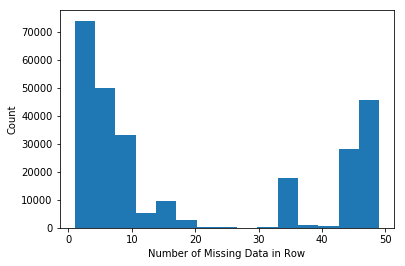

In [20]:
# How much data is missing in each row of the dataset?
null_rows = azdias.isnull().sum(axis=1)
plt.hist(null_rows[null_rows > 0], bins=15)
plt.xlabel('Number of Missing Data in Row')
plt.ylabel('Count');


In [21]:
null_rows.sum()

5035304

In [22]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.
less_missing = azdias[azdias.isnull().sum(axis=1)<10].reset_index(drop=True)
more_missing = azdias[azdias.isnull().sum(axis=1)>=10].reset_index(drop=True)


In [23]:
# Function to graph null column values from different dataframes
def distplotcolumn(df1, df2, masterdf, df1_desc, df2_desc, subplot_row=5, subplot_column=2, masterdf_rows=10):
    plt.figure(figsize=(25,25))
    for i, col in enumerate(df1.columns[:masterdf_rows]):
        plt.subplot(subplot_row, subplot_column, i+1)
        sns.distplot(df1[col][df1[col].notnull()], label=df1_desc)
        sns.distplot(df2[col][df2[col].notnull()], label=df2_desc)
        plt.title ('Non-Null Distribution for Column: {}'.format(col))
        plt.legend()
    

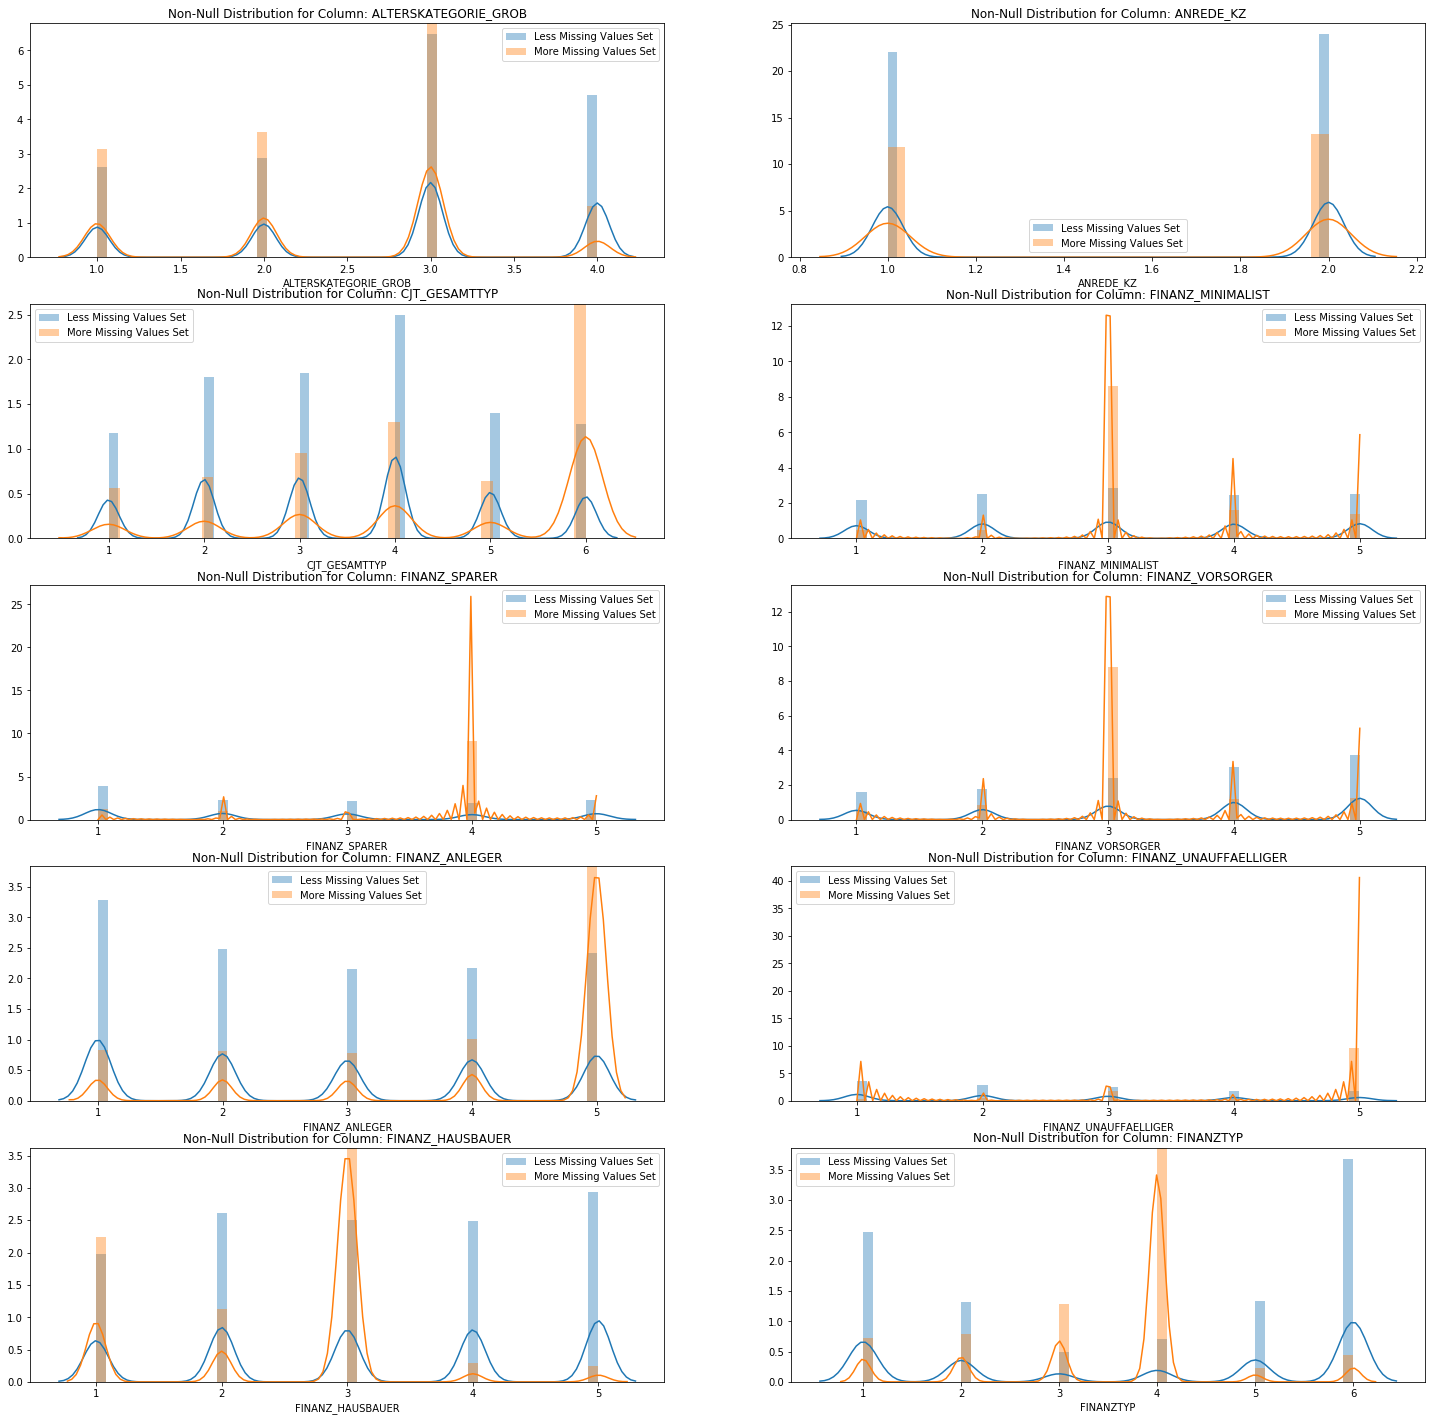

In [24]:
distplotcolumn(df1=less_missing, 
           df2=more_missing, 
           masterdf=azdias, 
           df1_desc='Less Missing Values Set',
           df2_desc='More Missing Values Set')

In [25]:
#columns = azdias_null.iloc[0:5].index.values.tolist()
columns = azdias.isnull()==0
columns = columns.columns[:5].tolist()
#columns = columns[:5]
columns

['ALTERSKATEGORIE_GROB',
 'ANREDE_KZ',
 'CJT_GESAMTTYP',
 'FINANZ_MINIMALIST',
 'FINANZ_SPARER']

In [26]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.

# function takes columns, number of rows, two dataframes and their descriptions to return 
# plot the distribution of values

def countplotcolumn (columns, num, df1, df2, df1_desc, df2_desc):   
    fig, ax1 = plt.subplots(num, 2, figsize=(18,25))
    fig.subplots_adjust(hspace=.4)
    ax1 = ax1.ravel()
    for i in range(num):
        sns.countplot(df1[columns[i]], ax=ax1[i*2], palette='magma')
        ax1[i*2].set_title(df1_desc)
        sns.countplot(df2[columns[i]], ax=ax1[i*2+1], palette='magma')
        ax1[i*2+1].set_title(df2_desc)


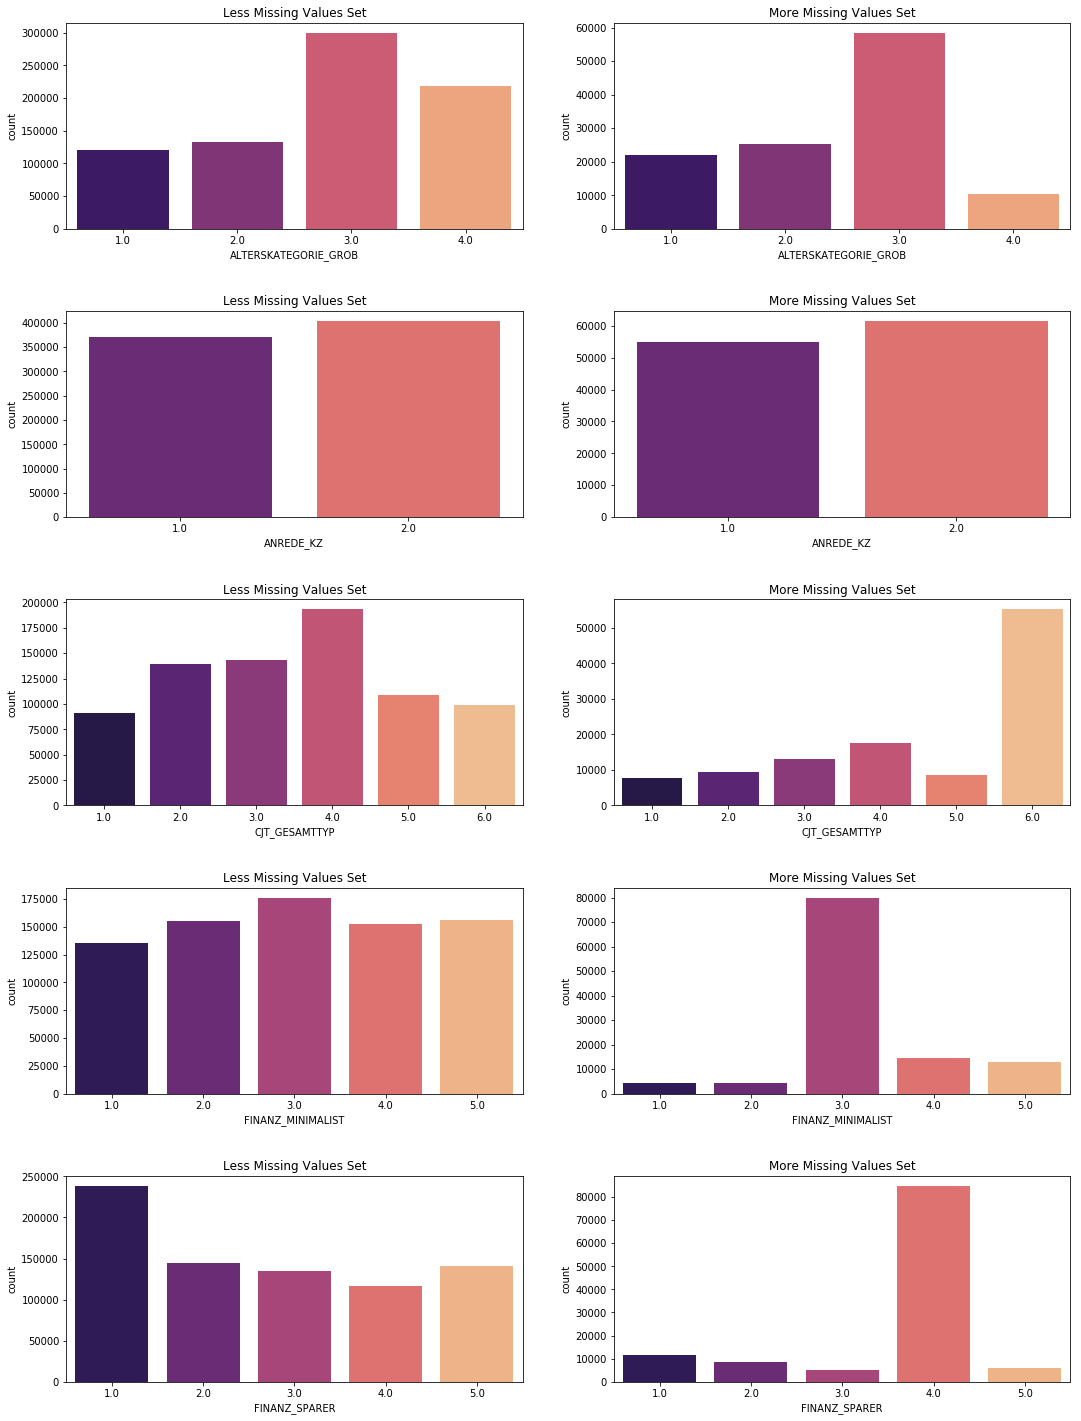

In [27]:
countplotcolumn(columns, 
                num =5, 
                df1=less_missing, 
                df2=more_missing,  
                df1_desc='Less Missing Values Set',
                df2_desc='More Missing Values Set' )

#### Assess Missing Data in Each Row

There seems to be a more significant disparity in the data with more missing values. The data distribution differs when comparing the set with more missing values and the set with less, except for column ANREDE_KZ. The plots with more missing data are smaller, which seems like an obvious outcome given that set has more missing values.  Because there is such a substantial difference between the datasets, it might not be a good idea to drop the rows with missing data. 

### Select and Re-Encode Features

In [28]:
# drop the columns that were removed from the azdias df earlier in the process
feat_info_dropped = feat_info.set_index('attribute').drop(drop_columns).reset_index()

In [29]:
# How many features are there of each data type?
feat_info_dropped['type'].value_counts()


ordinal        49
categorical    18
mixed           6
numeric         6
Name: type, dtype: int64

#### Re-Encode Categorical Features

In [30]:
feat_info_dropped.head()

,attribute,information_level,type,missing_or_unknown,nas
0,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]","[-1, 0, 9]"
1,ANREDE_KZ,person,categorical,"[-1,0]","[-1, 0]"
2,CJT_GESAMTTYP,person,categorical,[0],[0]
3,FINANZ_MINIMALIST,person,ordinal,[-1],[-1]
4,FINANZ_SPARER,person,ordinal,[-1],[-1]


In [31]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?
# Go through feat_info_dropped and find all the columns that are categorical and append to list
cat_columns = []
mixed_columns = []
for i in range(len(feat_info_dropped)):
    if feat_info_dropped['type'][i]== 'categorical':
        cat_columns.append(feat_info_dropped['attribute'][i])
    elif feat_info_dropped['type'][i] == 'mixed':
        mixed_columns.append(feat_info_dropped['attribute'][i])
cat_columns, mixed_columns

(['ANREDE_KZ',
  'CJT_GESAMTTYP',
  'FINANZTYP',
  'GFK_URLAUBERTYP',
  'GREEN_AVANTGARDE',
  'LP_FAMILIE_FEIN',
  'LP_FAMILIE_GROB',
  'LP_STATUS_FEIN',
  'LP_STATUS_GROB',
  'NATIONALITAET_KZ',
  'SHOPPER_TYP',
  'SOHO_KZ',
  'VERS_TYP',
  'ZABEOTYP',
  'GEBAEUDETYP',
  'OST_WEST_KZ',
  'CAMEO_DEUG_2015',
  'CAMEO_DEU_2015'],
 ['LP_LEBENSPHASE_FEIN',
  'LP_LEBENSPHASE_GROB',
  'PRAEGENDE_JUGENDJAHRE',
  'WOHNLAGE',
  'CAMEO_INTL_2015',
  'PLZ8_BAUMAX'])

In [32]:
# Check if values are binary or multi-level
binary_cat = []
multi_cat = []
for col in cat_columns:
    value = less_missing[col].nunique()
    if value == 2:
        binary_cat.append(col)
    else:
        multi_cat.append(col)
    print('{}: {}'.format(col, value))
        

ANREDE_KZ: 2
CJT_GESAMTTYP: 6
FINANZTYP: 6
GFK_URLAUBERTYP: 12
GREEN_AVANTGARDE: 2
LP_FAMILIE_FEIN: 11
LP_FAMILIE_GROB: 5
LP_STATUS_FEIN: 10
LP_STATUS_GROB: 5
NATIONALITAET_KZ: 3
SHOPPER_TYP: 4
SOHO_KZ: 2
VERS_TYP: 2
ZABEOTYP: 6
GEBAEUDETYP: 7
OST_WEST_KZ: 2
CAMEO_DEUG_2015: 9
CAMEO_DEU_2015: 44


In [33]:
less_missing[binary_cat].T

,0,1,2,3,4,5,6,7,8,9,...,774733,774734,774735,774736,774737,774738,774739,774740,774741,774742
ANREDE_KZ,2,2,2,1,2,2,1,1,2,2,...,1,1,2,2,2,2,1,2,1,1
GREEN_AVANTGARDE,0,1,0,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
SOHO_KZ,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
VERS_TYP,2,1,1,2,2,1,1,2,2,2,...,1,1,1,2,1,1,NaN,1,2,1
OST_WEST_KZ,W,W,W,W,W,W,W,W,W,W,...,W,W,W,W,W,W,W,W,W,W


OST_WEST_KZ does not contain numeric values, so it needs to be encoded. According to the data dictionary, the W is for West Germany, and the O is for East Germany. Therefore, OST_WEST_KZ will be added to the multi-level list to efficiently run OneHotEncoder on all the columns that require encoding with dummy variables. 

In [34]:
# Add columns to mulit_cat so they can be encoded using OneHotEncoder
# Remove columns from mixed_columns so remaining columns can be dropped
remove = ['PRAEGENDE_JUGENDJAHRE','CAMEO_INTL_2015', "WOHNLAGE"]
for i in remove:
    mixed_columns.remove(i)




In [35]:
multi_cat, binary_cat, mixed_columns


(['CJT_GESAMTTYP',
  'FINANZTYP',
  'GFK_URLAUBERTYP',
  'LP_FAMILIE_FEIN',
  'LP_FAMILIE_GROB',
  'LP_STATUS_FEIN',
  'LP_STATUS_GROB',
  'NATIONALITAET_KZ',
  'SHOPPER_TYP',
  'ZABEOTYP',
  'GEBAEUDETYP',
  'CAMEO_DEUG_2015',
  'CAMEO_DEU_2015'],
 ['ANREDE_KZ', 'GREEN_AVANTGARDE', 'SOHO_KZ', 'VERS_TYP', 'OST_WEST_KZ'],
 ['LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'PLZ8_BAUMAX'])

In [36]:
# Convert WOHNLAGE to category and use dummies to convert to numeric values
less_missing['WOHNLAGE']= less_missing['WOHNLAGE'].astype('category')
columns_dummies = ['WOHNLAGE','OST_WEST_KZ']
less_missing_encoded = pd.get_dummies(less_missing, columns=columns_dummies)

In [37]:
less_missing.shape

(774743, 79)

In [38]:
# combine mixed_columns and multi_cat so all can be dropped
mixed_columns.extend(multi_cat)


In [39]:
mixed_columns

['LP_LEBENSPHASE_FEIN',
 'LP_LEBENSPHASE_GROB',
 'PLZ8_BAUMAX',
 'CJT_GESAMTTYP',
 'FINANZTYP',
 'GFK_URLAUBERTYP',
 'LP_FAMILIE_FEIN',
 'LP_FAMILIE_GROB',
 'LP_STATUS_FEIN',
 'LP_STATUS_GROB',
 'NATIONALITAET_KZ',
 'SHOPPER_TYP',
 'ZABEOTYP',
 'GEBAEUDETYP',
 'CAMEO_DEUG_2015',
 'CAMEO_DEU_2015']

In [40]:
# Drop multi and mixed columns
# mixed_columns.extend(multi_cat)
less_missing_encoded.drop(mixed_columns, axis=1, inplace=True)

In [41]:
less_missing_encoded.shape

(774743, 71)

#### Re-Encode Categorical Features
All of the categorical columns with binary information were kept. OST_WEST_KZ was encoded using OneHotEncoder. All of the columns with multi-level categories were dropped. To keep it straight foward and not clog things up with extra features. 


#### Engineer Mixed-Type Features

### 1.18. PRAEGENDE_JUGENDJAHRE
Dominating movement of person's youth (avantgarde vs. mainstream; east vs. west)
- -1: unknown
-  0: unknown
-  1: 40s - war years (Mainstream, E+W)
-  2: 40s - reconstruction years (Avantgarde, E+W)
-  3: 50s - economic miracle (Mainstream, E+W)
-  4: 50s - milk bar / Individualisation (Avantgarde, E+W)
-  5: 60s - economic miracle (Mainstream, E+W)
-  6: 60s - generation 68 / student protestors (Avantgarde, W)
-  7: 60s - opponents to the building of the Wall (Avantgarde, E)
-  8: 70s - family orientation (Mainstream, E+W)
-  9: 70s - peace movement (Avantgarde, E+W)
- 10: 80s - Generation Golf (Mainstream, W)
- 11: 80s - ecological awareness (Avantgarde, W)
- 12: 80s - FDJ / communist party youth organisation (Mainstream, E)
- 13: 80s - Swords into ploughshares (Avantgarde, E)
- 14: 90s - digital media kids (Mainstream, E+W)
- 15: 90s - ecological awareness (Avantgarde, E+W)

In [42]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
decade = []
movement = []
for i in less_missing_encoded['PRAEGENDE_JUGENDJAHRE']:
    #append values to movement 0 = Mainstream 1 = Avantgarde
    if i in [1, 3, 5, 8, 10, 12, 14]:
        movement.append(0)
    elif i in [2, 4, 6, 7, 9, 11, 13, 15]:
        movement.append(1)
    else:
        movement.append(np.nan)
    # append values to decade
    if i in [1, 2]:
        decade.append(40)
    elif i in [3, 4]:
        decade.append(50)
    elif i in [5, 6, 7]:
        decade.append(60)
    elif i in [8, 9]:
        decade.append(70)
    elif i in [10, 11, 12, 13]:
        decade.append(80)
    elif i in [14, 15]:
        decade.append(90)
    else:
        decade.append(np.nan)
        
movement = pd.Series(movement)
decade = pd.Series(decade)

In [43]:
# Add the newly separated dimensions to the dataframe
less_missing_encoded['MOVEMENT'] = movement
less_missing_encoded['DECADE'] = decade

In [44]:
# Check to make sure values are in the data frame
less_missing_encoded['MOVEMENT'].value_counts()

0.0    578772
1.0    170469
Name: MOVEMENT, dtype: int64

In [45]:
less_missing_encoded['DECADE'].value_counts()

90.0    218377
70.0    170842
80.0    147224
60.0    112362
50.0     72943
40.0     27493
Name: DECADE, dtype: int64

In [46]:
# Drop "PRAEGENDE_JUGENDJAHRE" since the information is already in there
less_missing_encoded.drop("PRAEGENDE_JUGENDJAHRE", axis=1, inplace=True)

### 4.3. CAMEO_INTL_2015
German CAMEO: Wealth / Life Stage Typology, mapped to international code
- -1: unknown
- 11: Wealthy Households - Pre-Family Couples & Singles
- 12: Wealthy Households - Young Couples With Children
- 13: Wealthy Households - Families With School Age Children
- 14: Wealthy Households - Older Families &  Mature Couples
- 15: Wealthy Households - Elders In Retirement
- 21: Prosperous Households - Pre-Family Couples & Singles
- 22: Prosperous Households - Young Couples With Children
- 23: Prosperous Households - Families With School Age Children
- 24: Prosperous Households - Older Families & Mature Couples
- 25: Prosperous Households - Elders In Retirement
- 31: Comfortable Households - Pre-Family Couples & Singles
- 32: Comfortable Households - Young Couples With Children
- 33: Comfortable Households - Families With School Age Children
- 34: Comfortable Households - Older Families & Mature Couples
- 35: Comfortable Households - Elders In Retirement
- 41: Less Affluent Households - Pre-Family Couples & Singles
- 42: Less Affluent Households - Young Couples With Children
- 43: Less Affluent Households - Families With School Age Children
- 44: Less Affluent Households - Older Families & Mature Couples
- 45: Less Affluent Households - Elders In Retirement
- 51: Poorer Households - Pre-Family Couples & Singles
- 52: Poorer Households - Young Couples With Children
- 53: Poorer Households - Families With School Age Children
- 54: Poorer Households - Older Families & Mature Couples
- 55: Poorer Households - Elders In Retirement
- XX: unknown


In [47]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.
# Take the number and separate it the 10's place is wealth and the 1's place is lifestage
wealth = []
lifestage = []
for i in less_missing_encoded["CAMEO_INTL_2015"]:
    try:
        i=int(i)
        # append wealth values 
        if 10 <= i < 20:
            wealth.append(1)
        elif 20<= i <30:
            wealth.append(2)
        elif 30<= i <40:
            wealth.append(3)
        elif 40<= i <50:
            wealth.append(4)   
        elif 50<= i <60:
            wealth.append(5)
        else:
            wealth.append(np.nan)
        # append values to lifestage
        if i%10==1:
            lifestage.append(1)
        elif i%10==2:
            lifestage.append(2)
        elif i%10==3:
            lifestage.append(3)
        elif i%10==4:
            lifestage.append(4)
        elif i%10==5:
            lifestage.append(5)
        else:
            lifestage.append(np.nan)
    except:
        wealth.append(np.nan)
        lifestage.append(np.nan)


In [48]:
# Check 
len(lifestage) == less_missing_encoded.shape[0]

True

In [49]:
# Add newly separated dimensions
less_missing_encoded['WEALTH'] = wealth
less_missing_encoded['LIFESTAGE'] = lifestage

In [50]:
# Drop the CAMEO column to eliminate redundant data
less_missing_encoded.drop('CAMEO_INTL_2015', axis=1, inplace=True)

#### Engineer Mixed-Type Features
With the mixed data type WOHNLAGE was kept and encoded and columns LP_LEBENSPHASE_FEIN, LP_LEBENSPHASE_GROB, and PLZ8_BAUMAX were dropped. Much of the information seemed redundant after looking at the data dictionary. PRAEGENDE_JUGENDJAHRE and CAMEO_INTL_2015 had values separated out to create two new columns and the original columns were dropped.


#### Complete Feature Selection


### Create a Cleaning Function

In [51]:
drop_columns

['TITEL_KZ',
 'AGER_TYP',
 'KK_KUNDENTYP',
 'KBA05_BAUMAX',
 'GEBURTSJAHR',
 'ALTER_HH']

In [52]:

mixed_columns

['LP_LEBENSPHASE_FEIN',
 'LP_LEBENSPHASE_GROB',
 'PLZ8_BAUMAX',
 'CJT_GESAMTTYP',
 'FINANZTYP',
 'GFK_URLAUBERTYP',
 'LP_FAMILIE_FEIN',
 'LP_FAMILIE_GROB',
 'LP_STATUS_FEIN',
 'LP_STATUS_GROB',
 'NATIONALITAET_KZ',
 'SHOPPER_TYP',
 'ZABEOTYP',
 'GEBAEUDETYP',
 'CAMEO_DEUG_2015',
 'CAMEO_DEU_2015']

In [53]:
drop_columns.extend(mixed_columns)
drop_columns

['TITEL_KZ',
 'AGER_TYP',
 'KK_KUNDENTYP',
 'KBA05_BAUMAX',
 'GEBURTSJAHR',
 'ALTER_HH',
 'LP_LEBENSPHASE_FEIN',
 'LP_LEBENSPHASE_GROB',
 'PLZ8_BAUMAX',
 'CJT_GESAMTTYP',
 'FINANZTYP',
 'GFK_URLAUBERTYP',
 'LP_FAMILIE_FEIN',
 'LP_FAMILIE_GROB',
 'LP_STATUS_FEIN',
 'LP_STATUS_GROB',
 'NATIONALITAET_KZ',
 'SHOPPER_TYP',
 'ZABEOTYP',
 'GEBAEUDETYP',
 'CAMEO_DEUG_2015',
 'CAMEO_DEU_2015']

In [54]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...
    for attribute, nas in zip(feat_info['attribute'], feat_info['nas']):
        if nas[0] != '':
            for na in nas:
                if na.isnumeric() or na.lstrip('-').isnumeric():
                    na = int(na)
                df.loc[df[attribute] == na, attribute] = np.nan

    # remove selected columns and rows, ...
    #drop_columns.extend(mixed_columns)
    #drop_columns.append('CAMEO_DEU_2015') #already in mixed_columns
    for col in drop_columns:
        df.drop(col, axis=1, inplace=True)
    #df.drop(drop_columns, inplace=True, axis=1)
    less_missing_df2 = df[df.isnull().sum(axis=1)<10].reset_index(drop=True)
    more_missing_df2 = df[df.isnull().sum(axis=1)>=10].reset_index(drop=True)
    #for col in drop_columns:
        #less_missing_df2.drop(col, axis=1, inplace=True)
    # select, re-encode, and engineer column values.
    #less_missing_df2_encoded = pd.get_dummies(less_missing_df2, columns=multi_cat) #getting rid of these
    less_missing_df2['WOHNLAGE']= less_missing_df2['WOHNLAGE'].astype('category')
    less_missing_df2_encoded = pd.get_dummies(less_missing_df2, columns=columns_dummies)
    wealth = []
    lifestage = []
    for i in less_missing_df2_encoded["CAMEO_INTL_2015"]:
        try:
            i=int(i)
            # append wealth values 
            if 10 <= i < 20:
                wealth.append(1)
            elif 20<= i <30:
                wealth.append(2)
            elif 30<= i <40:
                wealth.append(3)
            elif 40<= i <50:
                wealth.append(4)   
            elif 50<= i <60:
                wealth.append(5)
            else:
                wealth.append(np.nan)
            # append values to lifestage
            if i%10==1:
                lifestage.append(1)
            elif i%10==2:
                lifestage.append(2)
            elif i%10==3:
                lifestage.append(3)
            elif i%10==4:
                lifestage.append(4)
            elif i%10==5:
                lifestage.append(5)
            else:
                lifestage.append(np.nan)
        except:
            wealth.append(np.nan)
            lifestage.append(np.nan)
    less_missing_df2_encoded['WEALTH'] = wealth
    less_missing_df2_encoded['LIFESTAGE'] = lifestage
    less_missing_df2_encoded.drop('CAMEO_INTL_2015', axis=1, inplace=True)
        
    decade = []
    movement = []
    for i in less_missing_df2_encoded['PRAEGENDE_JUGENDJAHRE']:
        #append values to movement 0 = Mainstream 1 = Avantgarde
        if i in [1, 3, 5, 8, 10, 12, 14]:
            movement.append(0)
        elif i in [2, 4, 6, 7, 9, 11, 13, 15]:
            movement.append(1)
        else:
            movement.append(np.nan)
        # append values to decade
        if i in [1, 2]:
            decade.append(40)
        elif i in [3, 4]:
            decade.append(50)
        elif i in [5, 6, 7]:
            decade.append(60)
        elif i in [8, 9]:
            decade.append(70)
        elif i in [10, 11, 12, 13]:
            decade.append(80)
        elif i in [14, 15]:
            decade.append(90)
        else:
            decade.append(np.nan)

    movement = pd.Series(movement)
    decade = pd.Series(decade)
    
    less_missing_df2_encoded['MOVEMENT'] = movement
    less_missing_df2_encoded['DECADE'] = decade
    less_missing_df2_encoded.drop("PRAEGENDE_JUGENDJAHRE", axis=1, inplace=True)


    
    # Return the cleaned dataframe.
    
    return less_missing_df2_encoded

## Step 2: Feature Transformation

### Apply Feature Scaling

In [55]:
# Number of missing values in each column
def miss(df):
    missing = less_missing_encoded.isnull().sum()
    missing.sort_values(inplace=True, ascending=False)
    missing = missing[missing > 0]
    return missing

In [56]:
miss(less_missing_encoded)

W_KEIT_KIND_HH          55257
REGIOTYP                54136
KKK                     54136
HEALTH_TYP              33420
VERS_TYP                33420
DECADE                  25502
MOVEMENT                25502
KBA05_ANTG3             24201
MOBI_REGIO              24201
KBA05_ANTG4             24201
KBA05_ANTG1             24201
KBA05_ANTG2             24201
KBA05_GBZ               24201
PLZ8_GBZ                 7783
PLZ8_HHZ                 7783
PLZ8_ANTG4               7783
PLZ8_ANTG3               7783
PLZ8_ANTG2               7783
PLZ8_ANTG1               7783
ANZ_HAUSHALTE_AKTIV      5651
KBA13_ANZAHL_PKW         5483
RELAT_AB                 3936
ARBEIT                   3936
ORTSGR_KLS9              3850
WEALTH                   3456
LIFESTAGE                3456
ANZ_HH_TITEL             3163
ALTERSKATEGORIE_GROB     2596
EWDICHTE                  526
BALLRAUM                  526
INNENSTADT                526
KONSUMNAEHE                51
GEBAEUDETYP_RASTER          5
dtype: int

In [57]:
# Fill missing values with the median value
impute = Imputer(strategy="median")
less_missing_encoded_filled = pd.DataFrame(impute.fit_transform(less_missing_encoded))

In [58]:
# Apply feature scaling to the general population demographics data
scaler = StandardScaler()
less_missing_encoded_scaled = scaler.fit_transform(less_missing_encoded_filled)

In [59]:
less_missing_encoded.shape

(774743, 73)

### Apply Feature Scaling
At first my thought was to drop all rows that had missing data, However, after checking it I was unwilling to loose that amount of data. The imputer function was used to replace the missing values with the median value. I choose the median value to avoid the chance that outliers would skew the number too far. 

### Perform Dimensionality Reduction

In [60]:
# Apply PCA to the data.
# less_missing_encoded_scaled - shortened to lmes
pca = PCA()
lmes_pca = pca.fit_transform(less_missing_encoded_scaled)

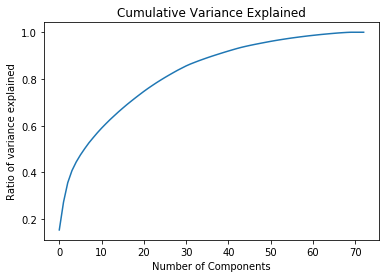

In [61]:
plt.plot(range(len(pca.explained_variance_ratio_)),np.cumsum(pca.explained_variance_ratio_), '-')
plt.title("Cumulative Variance Explained")
plt.xlabel("Number of Components")
plt.ylabel("Ratio of variance explained")
plt.show()

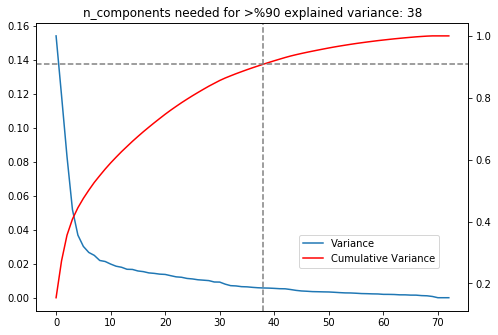

In [62]:
# Re-apply PCA to the data while selecting for number of components to retain.
# Graph to find the number of components required to maintain %90 variance:
def pca_plot2(pca):
    # find the number of conponents it would take to achive 90% variance
    n_components = min(np.where(np.cumsum(pca.explained_variance_ratio_)>0.90)[0]+1)
    # plot 
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1],True)
    ax2 = ax.twinx()
    ax.plot(pca.explained_variance_ratio_, label='Variance',)
    ax2.plot(np.cumsum(pca.explained_variance_ratio_), label='Cumulative Variance',color = 'red');
    ax.set_title('n_components needed for >%90 explained variance: {}'.format(n_components));
    ax.axvline(n_components, linestyle='dashed', color='grey')
    ax2.axhline(np.cumsum(pca.explained_variance_ratio_)[n_components], linestyle='dashed', color='grey')
    fig.legend(loc=(0.6,0.2));

pca_plot2(pca)

In [63]:
pca_38 = PCA(n_components= 38, random_state=10)
few_missing_pca = pca_38.fit_transform(less_missing_encoded_scaled)

In [64]:
pca_38.explained_variance_ratio_.sum()

0.90264272325743311

### Perform Dimensionality Reduction
The dimensions were combined and cut nearly in half to keep the variance at 90%. The goal is not to lose too much variability in the data. A smaller number of n_components allows the algorithm to run faster and reduces the complexity, making it more accurate if the right features have been chosen. 

### Interpret Principal Components

In [65]:
# # Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# Function to map the weights
def pca_weights(pca, i):
    df = pd.DataFrame(pca.components_, columns=list(less_missing_encoded.columns))
    weights = df.iloc[i].sort_values(ascending=False)
    return weights

In [73]:
# Function to plot the weights 
def plot_pca(weight, pca, n_component):
    #Plot the features with the most absolute variance for given pca component 
    component = pd.concat([weight.head(5), weight.tail(5)])
    
    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (8,5))
    component.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_title('Component {}'.format(n_component+1))
    

In [74]:
# # Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
weight1 = pca_weights(pca_38, 0)
weight1.head(5), weight1.tail(5)

(PLZ8_ANTG3     0.227742
 PLZ8_ANTG4     0.220678
 WEALTH         0.205787
 ORTSGR_KLS9    0.204111
 EWDICHTE       0.200471
 Name: 0, dtype: float64, FINANZ_MINIMALIST   -0.208122
 KBA05_GBZ           -0.214832
 KBA05_ANTG1         -0.220698
 PLZ8_ANTG1          -0.226380
 MOBI_REGIO          -0.240089
 Name: 0, dtype: float64)

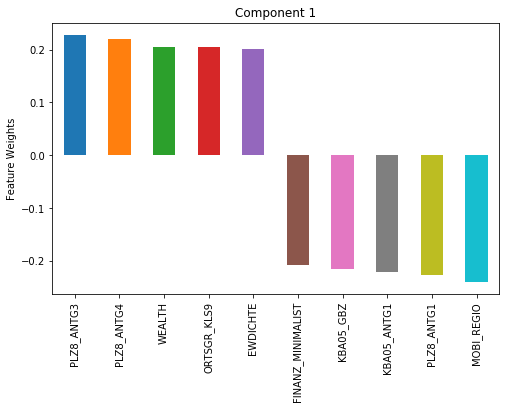

In [75]:
plot_pca(weight1, pca_38, 0)

(ALTERSKATEGORIE_GROB    0.266858
 FINANZ_VORSORGER        0.239135
 SEMIO_ERL               0.233535
 SEMIO_LUST              0.187454
 RETOURTYP_BK_S          0.165347
 Name: 1, dtype: float64, SEMIO_PFLICHT   -0.235602
 SEMIO_TRADV     -0.236284
 FINANZ_SPARER   -0.244803
 DECADE          -0.257561
 SEMIO_REL       -0.260694
 Name: 1, dtype: float64)

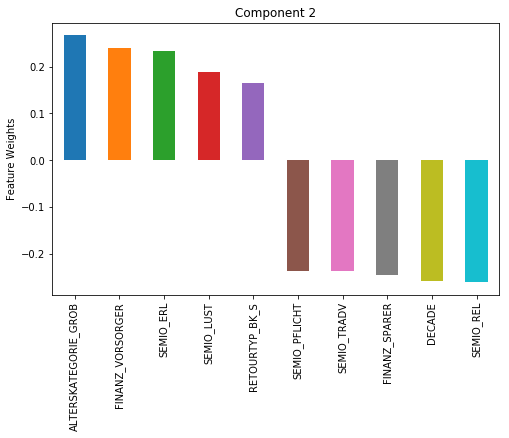

In [76]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.
weight2 = pca_weights(pca_38, 1)
plot_pca(weight2, pca, 1)
weight2.head(5), weight2.tail(5)

(ALTERSKATEGORIE_GROB    0.266858
 FINANZ_VORSORGER        0.239135
 SEMIO_ERL               0.233535
 SEMIO_LUST              0.187454
 RETOURTYP_BK_S          0.165347
 Name: 1, dtype: float64, SEMIO_PFLICHT   -0.235602
 SEMIO_TRADV     -0.236284
 FINANZ_SPARER   -0.244803
 DECADE          -0.257561
 SEMIO_REL       -0.260694
 Name: 1, dtype: float64)

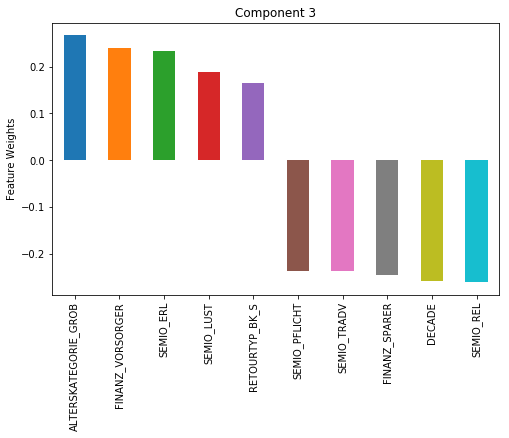

In [77]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.
weight3 = pca_weights(pca_38, 2)
plot_pca(weight2, pca, 2)
weight2.head(5), weight2.tail(5)

### Interpret Principal Components

The first component ALTERSKATEGORIE_GROB (Estimated age based on given name analysis) and FINANZ_VORSORGER (Prepared Financial typology), correlate positively. The number of people saving money increases when the age goes up. Alternatively, SEMIO_REL (religious personality typology) negatively correlates with ALTERSKATEGORIE_GROB.

The second component SEMIO_VERT (dreamful personality typology) and ANREDE_KZ (Gender), have a negative relationship. 

Lastly, the third component SEMIO_VERT (dreamful personality typology) and ANREDE_KZ (Gender), have a negative relationship. In contrast, SEMIO_KAEM (combative attitude personality typology) positively correlates with ANREDE_KZ. If we think about gender stereotypes, this makes sense. 

## Step 3: Clustering

### Apply Clustering to General Population


In [73]:
#function to return the k means score
def k_mean_score(data, n_cluster):
    kmeans = KMeans(n_clusters = n_cluster)
    model = kmeans.fit(data)
    score = np.abs(model.score(data))
    return score

#### DO NOT RUN THE CELL BELOW TAKES FOREVER

In [81]:
# run k-means clustering on the data and...

scores = []
ks = list(range(1,20))
for k in ks:
    scores.append(k_mean_score(lmes_pca, k))
    
    # compute the average within-cluster distances.
    
    

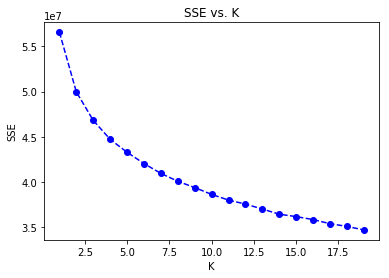

In [82]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.
plt.plot(ks, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('SSE vs. K');


In [79]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
kmeans = KMeans(n_clusters = 14)
model_14 = kmeans.fit(few_missing_pca)
lmes_pred = model_14.predict(few_missing_pca)



### Apply Clustering to General Population

The elbow appears to be at about 14. So, 14 will be used for the amount of clusters

### Apply All Steps to the Customer Data

In [80]:
# Load in the customer demographics data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', sep =';')

In [81]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.
customers_clean = clean_data(customers)



In [104]:
# Fill missing values with the median value
customers_encoded_filled = pd.DataFrame(impute.transform(customers_clean))

In [105]:
# Apply feature scaling to the general population demographics data
customers_encoded_scaled = scaler.transform(customers_encoded_filled)

In [106]:
# Check columns to see if clean_data function worked correctly
customers_clean.columns == less_missing_encoded.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False, False], dtype=bool)

In [107]:
#check last four columns
customers_clean.tail(5)

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,WOHNLAGE_4.0,WOHNLAGE_5.0,WOHNLAGE_7.0,WOHNLAGE_8.0,OST_WEST_KZ_O,OST_WEST_KZ_W,WEALTH,LIFESTAGE,MOVEMENT,DECADE
139638,3.0,1.0,5.0,1.0,5.0,1.0,1.0,2.0,1,3.0,...,0,0,0,0,0,1,1.0,4.0,1.0,50.0
139639,4.0,2.0,5.0,1.0,5.0,2.0,2.0,3.0,0,2.0,...,0,0,0,0,0,1,3.0,2.0,0.0,60.0
139640,4.0,1.0,5.0,1.0,5.0,1.0,1.0,2.0,1,2.0,...,0,0,0,0,0,1,2.0,4.0,1.0,50.0
139641,3.0,2.0,2.0,1.0,5.0,1.0,2.0,5.0,0,2.0,...,0,0,0,0,0,1,2.0,4.0,0.0,70.0
139642,2.0,1.0,5.0,1.0,5.0,1.0,1.0,2.0,0,2.0,...,0,0,1,0,0,1,3.0,3.0,0.0,50.0


In [108]:
#check last four columns 
less_missing_encoded.tail()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,WOHNLAGE_4.0,WOHNLAGE_5.0,WOHNLAGE_7.0,WOHNLAGE_8.0,OST_WEST_KZ_O,OST_WEST_KZ_W,MOVEMENT,DECADE,WEALTH,LIFESTAGE
774738,3.0,2.0,1.0,4.0,2.0,5.0,4.0,4.0,0,3.0,...,0,0,0,0,0,1,0.0,90.0,4.0,1.0
774739,2.0,1.0,3.0,3.0,3.0,2.0,2.0,3.0,0,NaN,...,0,1,0,0,0,1,0.0,80.0,5.0,1.0
774740,2.0,2.0,2.0,4.0,2.0,5.0,4.0,3.0,0,1.0,...,0,0,1,0,0,1,0.0,90.0,2.0,4.0
774741,1.0,1.0,1.0,5.0,3.0,5.0,5.0,5.0,0,1.0,...,0,1,0,0,0,1,0.0,90.0,5.0,1.0
774742,4.0,1.0,4.0,2.0,5.0,2.0,1.0,5.0,0,2.0,...,1,0,0,0,0,1,0.0,50.0,4.0,3.0


The function worked. However, the last four columns are in a different order, but it should not make a difference.

In [109]:
#transform the customers data using pca object
customers_clean_pca = pca_38.transform(customers_encoded_scaled)
#predict clustering using the kmeans object
pred_customers = model_14.predict(customers_clean_pca)

### Compare Customer Data to Demographics Data

In [110]:
# Create a dataframe to use for plot
customer_pred_df = pd.DataFrame(pred_customers,columns=['customer_prediction'])
general_pred_df =  pd.DataFrame(lmes_pred,columns=['general_prediction'])

In [111]:
prop_cust = customer_pred_df['customer_prediction'].value_counts().sort_index()/ \
                sum(customer_pred_df['customer_prediction'].value_counts())
prop_gen = general_pred_df['general_prediction'].value_counts().sort_index()/ \
                sum(general_pred_df['general_prediction'].value_counts())


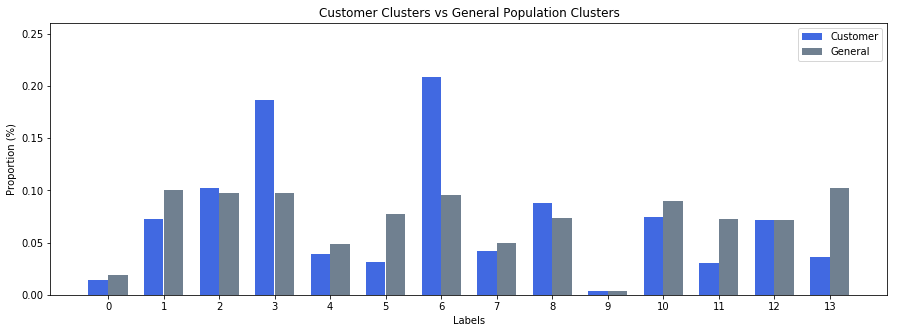

In [112]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population
fig,ax = plt.subplots(figsize=(15,5))
width = 0.35

cust = ax.bar(prop_cust.index-.51*width, prop_cust, width, color='royalblue')
gen = ax.bar(prop_gen.index+.51*width, prop_gen, width, color='slategrey')

ax.set_title('Customer Clusters vs General Population Clusters')
ax.legend(('Customer','General'));
ax.set_ylabel('Proportion (%)')
ax.set_xlabel('Labels')
ax.set_xticks(prop_cust.index)
ax.set_ylim(top=max(prop_cust.append(prop_gen))*1.25);



In [113]:
centroid_6 = scaler.inverse_transform(pca_38.inverse_transform(model_14.cluster_centers_[6]))

In [114]:
customer_over = pd.Series(data = centroid_6, index = customers_clean.columns)
customer_over

ALTERSKATEGORIE_GROB       3.840419
ANREDE_KZ                  0.932114
FINANZ_MINIMALIST          5.343551
FINANZ_SPARER              0.906057
FINANZ_VORSORGER           4.993936
FINANZ_ANLEGER             1.207155
FINANZ_UNAUFFAELLIGER      1.319257
FINANZ_HAUSBAUER           1.790019
GREEN_AVANTGARDE           0.272080
HEALTH_TYP                 2.132651
RETOURTYP_BK_S             4.128036
SEMIO_SOZ                  4.766951
SEMIO_FAM                  4.339853
SEMIO_REL                  2.950464
SEMIO_MAT                  2.923415
SEMIO_VERT                 6.541326
SEMIO_LUST                 5.903758
SEMIO_ERL                  4.609040
SEMIO_KULT                 4.527336
SEMIO_RAT                  1.821612
SEMIO_KRIT                 3.007545
SEMIO_DOM                  2.772491
SEMIO_KAEM                 1.978136
SEMIO_PFLICHT              2.352126
SEMIO_TRADV                2.282355
SOHO_KZ                    0.010629
VERS_TYP                   1.577859
ANZ_PERSONEN               2

In [115]:
centroid_13 = scaler.inverse_transform(pca_38.inverse_transform(model_14.cluster_centers_[13]))
customer_under = pd.Series(data = centroid_13, index = customers_clean.columns)
customer_under

ALTERSKATEGORIE_GROB       2.670649
ANREDE_KZ                  1.786360
FINANZ_MINIMALIST          2.890864
FINANZ_SPARER              2.297734
FINANZ_VORSORGER           3.825095
FINANZ_ANLEGER             2.485552
FINANZ_UNAUFFAELLIGER      2.572581
FINANZ_HAUSBAUER           3.711039
GREEN_AVANTGARDE           0.280423
HEALTH_TYP                 1.931273
RETOURTYP_BK_S             3.273897
SEMIO_SOZ                  3.555970
SEMIO_FAM                  3.778175
SEMIO_REL                  4.317357
SEMIO_MAT                  4.621190
SEMIO_VERT                 3.306929
SEMIO_LUST                 4.588900
SEMIO_ERL                  4.530666
SEMIO_KULT                 3.952765
SEMIO_RAT                  4.831117
SEMIO_KRIT                 4.869431
SEMIO_DOM                  5.367055
SEMIO_KAEM                 5.350646
SEMIO_PFLICHT              4.669374
SEMIO_TRADV                4.379771
SOHO_KZ                    0.009354
VERS_TYP                   1.476194
ANZ_PERSONEN               1

### Compare Customer Data to Demographics Data
Cluster five is over-represented in the customer data compared to the general data. Their average life stage is 2.76. So, they are young couples with children almost to the school-aged children stage. Their average decade is 62.42, and the neighborhood quality(WONLAGE) is a rural area. 

In cluster thirteen, the customer data is underrepresented compared to the general data. For example, WONLAGE shows that most people come from an average neighborhood with older families or mature couples (LIFESTAGE). They are also in the upper area of wealth (1.97). 